# Exemplo de Utilização do modelo SMAP

## Exemplo 1:
Verificação dos parâmetros

In [1]:
import os
os.chdir('../..')
import Quantity.Hydrological.SMAP as SMAP

Str = 1000
AD = 1000
Crec = 20
TUin = 100/100
EBin = 0
Capc = 30
kkt = 30
k2t = 1
Ai = 2.5


size = 10

P = [10 for _ in range(size)]
ET = [2 for _ in range(size)]


Verificação se os parâmetros estão dentro dos limites

In [2]:
bacia = SMAP.SMAP.Basin(Str, AD, Crec, TUin, EBin, Capc, kkt, k2t, Ai)
bacia.IsValid()

True

Extração dos resultados

In [3]:
ponto = SMAP.SMAP.Point(P, ET)
modelo = SMAP.SMAP(ponto, bacia)

Para que o modelo seja executado, é necessário chamar o método RunModel()

In [4]:
modelo.RunModel()

Os resultados ficam armazenados no atributo "Q"

In [5]:
resultados = modelo.Q

print('Dia - Vazão')
for dia, vazao in enumerate(resultados):
    print(f'{dia:^3_} - {vazao:.3f}')

Dia - Vazão
 0  - 46.296
 1  - 69.444
 2  - 81.019
 3  - 86.806
 4  - 89.699
 5  - 91.146
 6  - 91.869
 7  - 92.231
 8  - 92.412
 9  - 92.502


## Exemplo 2:
Importação de valores utilizando a biblioteca pandas em um dataset da região de Biritiba

In [6]:
import pandas as pd
df = pd.read_excel('Datasets/Biritiba_SMAP.xlsx')

In [7]:
display(df)

,ET,P
0,5.266667,0.000000
1,5.266667,0.000000
2,5.266667,0.000000
3,5.266667,0.400000
4,5.266667,4.200000
...,...,...
2118,3.233333,0.000000
2119,3.233333,0.000000
2120,3.233333,0.000000
2121,3.233333,1.086667


In [8]:
import Quantity.Hydrological.SMAP as SMAP
import pandas as pd

bacia_Biritiba = SMAP.SMAP.Basin(Str=100,
                                 k2t=1.43064763229058,
                                 Crec=19.612562479845,
                                 Ai=2, Capc=30/100,
                                 kkt=47.5320152819107,
                                 TUin=.05, EBin=0,
                                 AD=70.2)

df = pd.read_excel('Datasets/Biritiba_SMAP.xlsx')

ponto_Biritiba = SMAP.SMAP.Point(df['P'].to_list(), df['ET'].to_list())

modelo_Biritiba = SMAP.SMAP(ponto_Biritiba, bacia_Biritiba)
modelo_Biritiba.RunModel()


## Exportação

###  Planilha dos resultados

In [9]:
# Utilizando o mesmo dataframe da entrada
df['MOGEST'] = modelo_Biritiba.Q
df.to_excel('Datasets/Results/smap_biritiba.xlsx')

In [10]:
display(df)

,ET,P,MOGEST
0,5.266667,0.000000,0.000000
1,5.266667,0.000000,0.000000
2,5.266667,0.000000,0.000000
3,5.266667,0.400000,0.000000
4,5.266667,4.200000,0.015384
...,...,...,...
2118,3.233333,0.000000,0.192869
2119,3.233333,0.000000,0.176812
2120,3.233333,0.000000,0.165750
2121,3.233333,1.086667,0.157789


### Gráfico

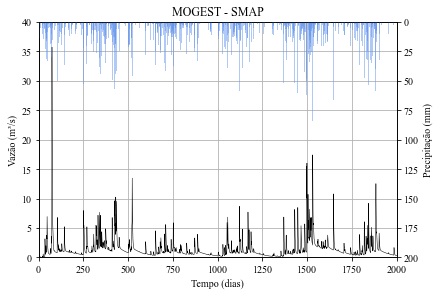

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

fig, ax = plt.subplots(constrained_layout=True)
ax.grid(True)

x_axis = [i for i in range(ponto_Biritiba.n)]

ax.set_xlim(0, 2000)
ax.set_ylim(0, 40)
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Vazão (m³/s)')
prec = ax.twinx()
prec.bar(x_axis, df['P'], color='cornflowerblue', width=5, zorder=1, alpha=.5)
prec.set_ylim(0,200)
prec.invert_yaxis()
prec.set_ylabel('Precipitação (mm)')
ax.plot(x_axis, modelo_Biritiba.Q, color='black', linewidth=.5, zorder=2)
ax.set_title('MOGEST - SMAP')
plt.savefig('Datasets/Results/smap_biritiba_graph.pdf', bbox_inches='tight')